# Perform explorative attribute analysis for a given event log
This is only for attribute visualization purposes

## Setup

In [1]:
import pm4py
import helper
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
data_file_path = 'data/synthetic/maardji et al 2013_xes_attributes/logs/cb/cb10k.xes'

## Load an event log

In [3]:
# Display the data info
data_info = helper.get_data_information(data_file_path)
data_info

{'file_path': 'data\\synthetic\\maardji et al 2013_xes_attributes\\logs\\cb\\cb10k.xes',
 'file_name': 'cb10k',
 'drift_type': 'sudden',
 'dataset': 'maardji et al 2013',
 'is_synthetic': True,
 'has_generated_attributes': True,
 'size': 10000,
 'change_points': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000],
 'change_point_explanations': {'1000': [{'attribute_name': 'relevant_attribute_1',
    'drift_type': 'sudden',
    'drift_location': 1000}],
  '2000': [{'attribute_name': 'relevant_attribute_2',
    'drift_type': 'sudden',
    'drift_location': 2000}],
  '3000': [{'attribute_name': 'relevant_attribute_3',
    'drift_type': 'sudden',
    'drift_location': 3000}],
  '4000': [],
  '5000': [],
  '6000': [],
  '7000': [],
  '8000': [],
  '9000': []}}

In [4]:
# load the event log into pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply(data_file_path)

C:\Users\Lennart\Tools\Anaconda3\envs\concept_drift\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████████████████████████████████████| 10000/10000 [00:11<00:00, 896.27it/s]


In [5]:
trace_attributes = helper.get_trace_attributes(log)

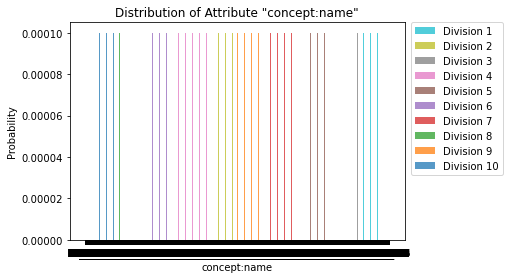

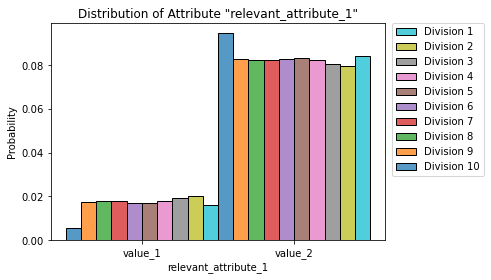

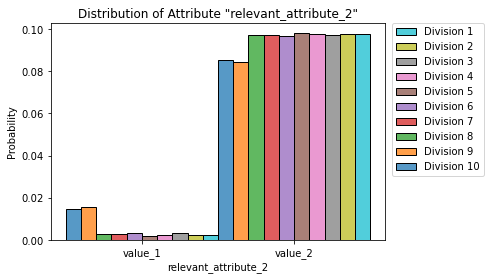

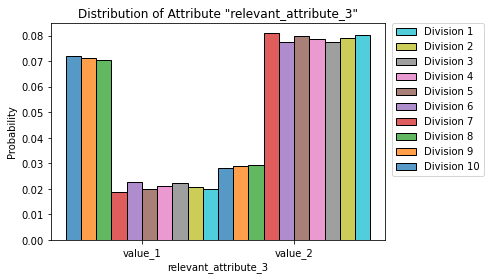

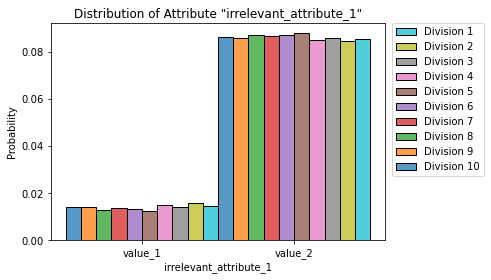

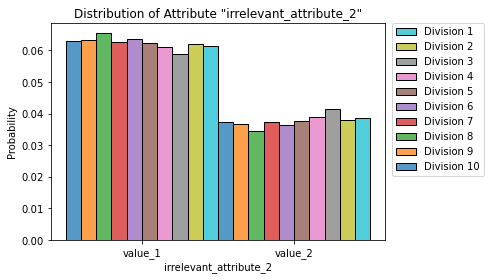

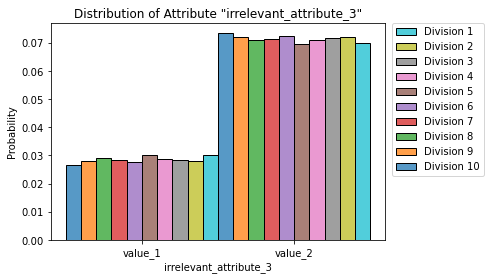

In [6]:
divisions = None
# show distributions for all attributes
def plot_attribute_distribution(attribute_series, divide_by=1):
    # put attribute series into a dataframe to add a hue
    attribute_df = pd.DataFrame(attribute_series)    
    division_sizes = int(len(attribute_series) / divide_by)
    
    attribute_df['Divisions'] = [f'Division {math.floor(index / division_sizes)+1}' for index in attribute_df.index]
    
    g = sns.histplot(data=attribute_df, x=attribute_series.name, 
                         hue='Divisions', multiple='dodge', stat='probability')
    
    # display the legend to the right of the plot
    plt.legend(attribute_df['Divisions'].unique(), bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    # add a title
    plt.title(f'Distribution of Attribute "{attribute_series.name}"')    
    
    # show the plot
    plt.show()

for attribute_name, trace_attribute_data in trace_attributes.items():
    plot_attribute_distribution(trace_attribute_data, divide_by=10)